## 1. Выбор начальных условий

### 1.1 Набор данных для классификации

**Выбранный датасет:** Stroke Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

**Обоснование выбора:**
- Содержит медицинские данные о пациентах и бинарную целевую переменную (наличие/отсутствие инсульта)
- Имеет разнообразные признаки: числовые (возраст, уровень глюкозы, ИМТ) и категориальные (пол, наличие гипертонии, курение)
- Представляет практическую ценность для задачи раннего выявления риска инсульта
- Несбалансированные классы, что позволяет изучить работу с реальными данными

### 1.2 Набор данных для регрессии

**Выбранный датасет:** Medical Insurance Cost Dataset (https://www.kaggle.com/datasets/mirichoi0218/insurance)

**Обоснование выбора:**
- Содержит информацию о медицинских страховых выплатах (непрерывная целевая переменная)
- Включает разнообразные признаки: возраст, ИМТ, количество детей, регион, курение
- Позволяет предсказывать стоимость страховки на основе характеристик клиента
- Данные имеют практическое применение в страховом бизнесе

### 1.3 Метрики качества

**Для задачи классификации:**
- **Accuracy (Точность)** - общая доля правильных предсказаний
- **Precision (Точность положительного класса)** - доля правильно предсказанных инсультов среди всех предсказанных инсультов
- **Recall (Полнота)** - доля найденных случаев инсульта среди всех реальных случаев
- **F1-Score** - гармоническое среднее между Precision и Recall
- **ROC-AUC** - площадь под ROC-кривой, показывает качество ранжирования

**Обоснование:** В медицинской диагностике важно минимизировать ложноотрицательные результаты (пропуск инсульта), поэтому Recall особенно важен. F1-Score даст сбалансированную оценку.

**Для задачи регрессии:**
- **MAE (Mean Absolute Error)** - средняя абсолютная ошибка, легко интерпретируется
- **RMSE (Root Mean Squared Error)** - корень из средней квадратичной ошибки, штрафует большие ошибки
- **R² (коэффициент детерминации)** - показывает долю объясненной дисперсии

**Обоснование:** MAE дает понятную оценку в денежных единицах, RMSE чувствителен к выбросам, R² показывает общее качество модели.


## 2. Импорт необходимых библиотек


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve,
    mean_absolute_error, mean_squared_error, r2_score
)

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 3. Загрузка данных

**Примечание:** Датасеты должны быть скачаны с Kaggle и размещены в папке `data`:
- Stroke Prediction: `data/healthcare-dataset-stroke-data.csv`
- Insurance: `data/insurance.csv`


In [42]:
# Загружаем датасет для классификации (Stroke Prediction)
stroke_data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

# Загружаем датасет для регрессии (Insurance Cost)
insurance_data = pd.read_csv('../data/insurance.csv')

# Выводим информацию о загруженных данных
print("=" * 50)
print("ДАТАСЕТ ДЛЯ КЛАССИФИКАЦИИ (Stroke Prediction)")
print("=" * 50)
print(f"Количество записей: {stroke_data.shape[0]}")
print(f"Количество признаков: {stroke_data.shape[1]}")

print("\n" + "=" * 50)
print("ДАТАСЕТ ДЛЯ РЕГРЕССИИ (Insurance Cost)")
print("=" * 50)
print(f"Количество записей: {insurance_data.shape[0]}")
print(f"Количество признаков: {insurance_data.shape[1]}")


ДАТАСЕТ ДЛЯ КЛАССИФИКАЦИИ (Stroke Prediction)
Количество записей: 5110
Количество признаков: 12

ДАТАСЕТ ДЛЯ РЕГРЕССИИ (Insurance Cost)
Количество записей: 1338
Количество признаков: 7


## 4. Предварительный анализ данных

### 4.1 Анализ датасета для классификации (Stroke Prediction)


In [43]:
print("Первые 5 строк датасета:")
print(stroke_data.head())

print("\n" + "=" * 50)
print("Информация о столбцах:")
print("=" * 50)
print(stroke_data.info())

print("\n" + "=" * 50)
print("Статистика числовых признаков:")
print("=" * 50)
print(stroke_data.describe())


Первые 5 строк датасета:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Информация о столбцах:
<class 

Пропущенные значения в датасете:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Распределение целевой переменной 'stroke':
stroke
0    4861
1     249
Name: count, dtype: int64

Процентное соотношение:
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


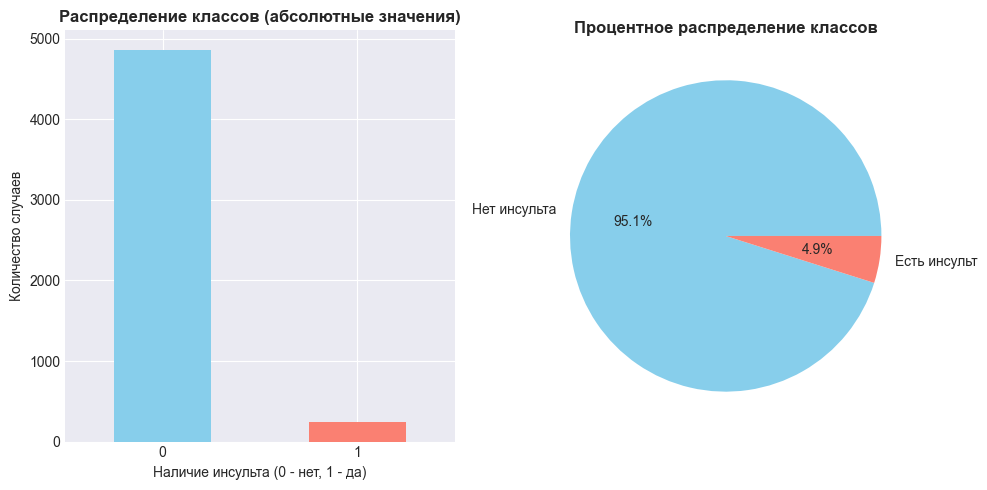

In [44]:
print("Пропущенные значения в датасете:")
print(stroke_data.isnull().sum())

print("\n" + "=" * 50)
print("Распределение целевой переменной 'stroke':")
print("=" * 50)
print(stroke_data['stroke'].value_counts())
print(f"\nПроцентное соотношение:")
print(stroke_data['stroke'].value_counts(normalize=True) * 100)

plt.figure(figsize=(10, 5))

# График 1: столбчатая диаграмма
plt.subplot(1, 2, 1)
stroke_data['stroke'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение классов (абсолютные значения)', fontsize=12, fontweight='bold')
plt.xlabel('Наличие инсульта (0 - нет, 1 - да)')
plt.ylabel('Количество случаев')
plt.xticks(rotation=0)

# График 2: круговая диаграмма
plt.subplot(1, 2, 2)
stroke_data['stroke'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                          colors=['skyblue', 'salmon'],
                                          labels=['Нет инсульта', 'Есть инсульт'])
plt.title('Процентное распределение классов', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Вывод: Данные несбалансированы, класс 'инсульт' представлен значительно меньше**

### 4.2 Анализ датасета для регрессии (Insurance Cost)


In [45]:
print("Первые 5 строк датасета:")
print(insurance_data.head())

print("\n" + "=" * 50)
print("Информация о столбцах:")
print("=" * 50)
print(insurance_data.info())

print("\n" + "=" * 50)
print("Статистика числовых признаков:")
print("=" * 50)
print(insurance_data.describe())


Первые 5 строк датасета:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Статистика числовых признаков:
          

Пропущенные значения в датасете:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Статистика целевой переменной 'charges':
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


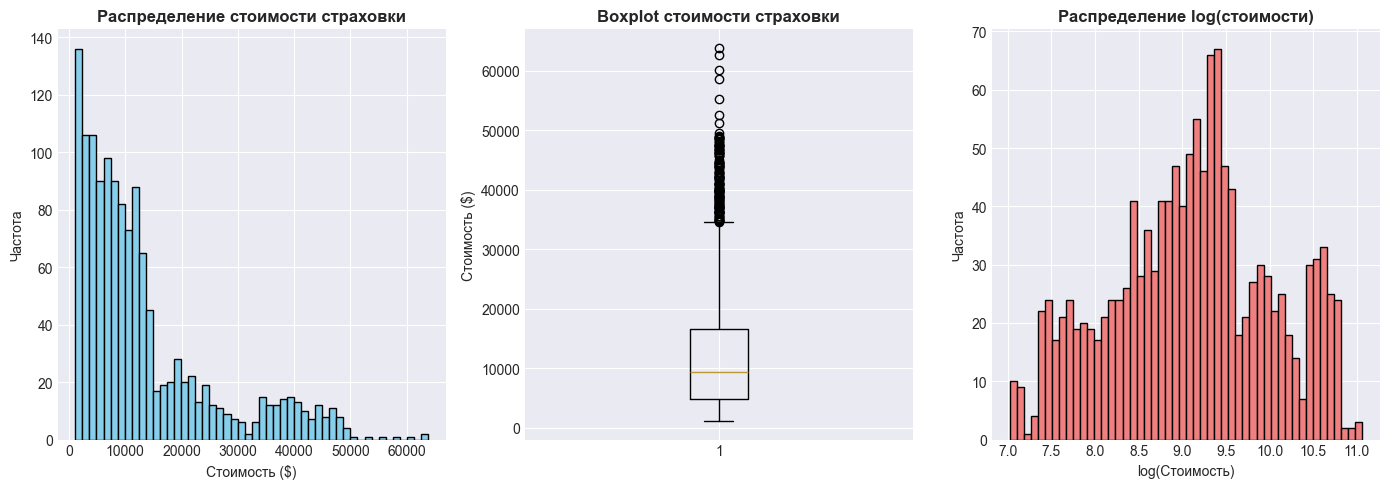

In [46]:
print("Пропущенные значения в датасете:")
print(insurance_data.isnull().sum())

print("\n" + "=" * 50)
print("Статистика целевой переменной 'charges':")
print("=" * 50)
print(insurance_data['charges'].describe())

plt.figure(figsize=(14, 5))

# График 1: гистограмма
plt.subplot(1, 3, 1)
plt.hist(insurance_data['charges'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение стоимости страховки', fontsize=12, fontweight='bold')
plt.xlabel('Стоимость ($)')
plt.ylabel('Частота')

# График 2: boxplot для выявления выбросов
plt.subplot(1, 3, 2)
plt.boxplot(insurance_data['charges'], vert=True)
plt.title('Boxplot стоимости страховки', fontsize=12, fontweight='bold')
plt.ylabel('Стоимость ($)')

# График 3: распределение логарифма стоимости (для проверки нормальности)
plt.subplot(1, 3, 3)
plt.hist(np.log(insurance_data['charges']), bins=50, color='lightcoral', edgecolor='black')
plt.title('Распределение log(стоимости)', fontsize=12, fontweight='bold')
plt.xlabel('log(Стоимость)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

**Вывод: Распределение стоимости имеет положительную асимметрию**

## 5. Предобработка данных

### 5.1 Предобработка датасета для классификации


In [ ]:
stroke_df = stroke_data.copy()

# Удаляем столбец 'id', так как он не несет информации для прогнозирования
stroke_df = stroke_df.drop('id', axis=1)

# Обработка пропущенных значений в столбце 'bmi'
# Заполняем пропуски медианным значением ИМТ
print(f"Пропущенных значений в 'bmi' до заполнения: {stroke_df['bmi'].isnull().sum()}")
stroke_df['bmi'].fillna(stroke_df['bmi'].median(), inplace=True)
print(f"Пропущенных значений в 'bmi' после заполнения: {stroke_df['bmi'].isnull().sum()}")

# Обработка категориальных признаков с помощью Label Encoding
label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

print("\n" + "=" * 50)
print("Кодирование категориальных признаков:")
print("=" * 50)

for col in categorical_columns:
    # Создаем отдельный энкодер для каждого столбца
    le = LabelEncoder()
    stroke_df[col] = le.fit_transform(stroke_df[col])
    label_encoders[col] = le
    print(f"{col}: {list(le.classes_)}")

# Разделяем данные на признаки (X) и целевую переменную (y)
X_stroke = stroke_df.drop('stroke', axis=1)
y_stroke = stroke_df['stroke']

print("\n" + "=" * 50)
print("Размерности после предобработки:")
print("=" * 50)
print(f"X_stroke: {X_stroke.shape}")
print(f"y_stroke: {y_stroke.shape}")
print(f"\nПризнаки: {list(X_stroke.columns)}")


Пропущенных значений в 'bmi' до заполнения: 201
Пропущенных значений в 'bmi' после заполнения: 0

Кодирование категориальных признаков:
gender: ['Female', 'Male', 'Other']
ever_married: ['No', 'Yes']
work_type: ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']
Residence_type: ['Rural', 'Urban']
smoking_status: ['Unknown', 'formerly smoked', 'never smoked', 'smokes']

Размерности после предобработки:
X_stroke: (5110, 10)
y_stroke: (5110,)

Признаки: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


### 5.2 Предобработка датасета для регрессии


In [ ]:
insurance_df = insurance_data.copy()

print(f"Пропущенных значений в датасете: {insurance_df.isnull().sum().sum()}")

# Кодирование категориальных признаков
# sex: male/female -> 0/1
# smoker: yes/no -> 0/1
# region: закодируем с помощью Label Encoding

insurance_df['sex'] = insurance_df['sex'].map({'male': 0, 'female': 1})
insurance_df['smoker'] = insurance_df['smoker'].map({'no': 0, 'yes': 1})

# Для региона используем Label Encoding
le_region = LabelEncoder()
insurance_df['region'] = le_region.fit_transform(insurance_df['region'])

print("\n" + "=" * 50)
print("Кодирование категориальных признаков:")
print("=" * 50)
print(f"sex: male=0, female=1")
print(f"smoker: no=0, yes=1")
print(f"region: {list(le_region.classes_)}")

# Разделяем данные на признаки (X) и целевую переменную (y)
X_insurance = insurance_df.drop('charges', axis=1)
y_insurance = insurance_df['charges']

print("\n" + "=" * 50)
print("Размерности после предобработки:")
print("=" * 50)
print(f"X_insurance: {X_insurance.shape}")
print(f"y_insurance: {y_insurance.shape}")
print(f"\nПризнаки: {list(X_insurance.columns)}")


Пропущенных значений в датасете: 0

Кодирование категориальных признаков:
sex: male=0, female=1
smoker: no=0, yes=1
region: ['northeast', 'northwest', 'southeast', 'southwest']

Размерности после предобработки:
X_insurance: (1338, 6)
y_insurance: (1338,)

Признаки: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


## 6. Разделение данных и масштабирование

### 6.1 Разделение данных для классификации


In [ ]:
# Разделяем данные на тренировочную (80%) и тестовую (20%) выборки
X_train_stroke, X_test_stroke, y_train_stroke, y_test_stroke = train_test_split(
    X_stroke, y_stroke, test_size=0.2, random_state=42, stratify=y_stroke
)

print("Размеры выборок для классификации:")
print(f"Train: X={X_train_stroke.shape}, y={y_train_stroke.shape}")
print(f"Test:  X={X_test_stroke.shape}, y={y_test_stroke.shape}")

# Проверяем баланс классов в тренировочной и тестовой выборках
print("\nРаспределение классов в тренировочной выборке:")
print(y_train_stroke.value_counts(normalize=True))
print("\nРаспределение классов в тестовой выборке:")
print(y_test_stroke.value_counts(normalize=True))

# Масштабирование признаков
scaler_stroke = StandardScaler()
X_train_stroke_scaled = scaler_stroke.fit_transform(X_train_stroke)
X_test_stroke_scaled = scaler_stroke.transform(X_test_stroke)


Размеры выборок для классификации:
Train: X=(4088, 10), y=(4088,)
Test:  X=(1022, 10), y=(1022,)

Распределение классов в тренировочной выборке:
stroke
0    0.951321
1    0.048679
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
stroke
0    0.951076
1    0.048924
Name: proportion, dtype: float64

Данные успешно масштабированы с помощью StandardScaler


### 6.2 Разделение данных для регрессии


In [ ]:
# Разделяем данные на тренировочную (80%) и тестовую (20%) выборки
X_train_insurance, X_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    X_insurance, y_insurance, test_size=0.2, random_state=42
)

print("Размеры выборок для регрессии:")
print(f"Train: X={X_train_insurance.shape}, y={y_train_insurance.shape}")
print(f"Test:  X={X_test_insurance.shape}, y={y_test_insurance.shape}")

# Проверяем статистику целевой переменной в тренировочной и тестовой выборках
print("\nСтатистика целевой переменной в тренировочной выборке:")
print(y_train_insurance.describe())
print("\nСтатистика целевой переменной в тестовой выборке:")
print(y_test_insurance.describe())

# Масштабирование признаков
scaler_insurance = StandardScaler()
X_train_insurance_scaled = scaler_insurance.fit_transform(X_train_insurance)
X_test_insurance_scaled = scaler_insurance.transform(X_test_insurance)

Размеры выборок для регрессии:
Train: X=(1070, 6), y=(1070,)
Test:  X=(268, 6), y=(268,)

Статистика целевой переменной в тренировочной выборке:
count     1070.000000
mean     13346.089736
std      12019.510778
min       1121.873900
25%       4897.667387
50%       9575.442100
75%      16746.657400
max      62592.873090
Name: charges, dtype: float64

Статистика целевой переменной в тестовой выборке:
count      268.000000
mean     12968.317063
std      12483.196202
min       1131.506600
25%       4288.744850
50%       8487.880300
75%      16367.829375
max      63770.428010
Name: charges, dtype: float64

Данные успешно масштабированы с помощью StandardScaler


## 7. Обучение и оценка моделей KNN

### 7.1 KNN для классификации (базовая модель)


In [ ]:
# Создаем и обучаем базовую модель KNN с k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_stroke_scaled, y_train_stroke)

# Делаем предсказания на тестовой выборке
y_pred_stroke = knn_classifier.predict(X_test_stroke_scaled)
y_pred_proba_stroke = knn_classifier.predict_proba(X_test_stroke_scaled)[:, 1]

# Оцениваем качество модели
accuracy = accuracy_score(y_test_stroke, y_pred_stroke)
precision = precision_score(y_test_stroke, y_pred_stroke)
recall = recall_score(y_test_stroke, y_pred_stroke)
f1 = f1_score(y_test_stroke, y_pred_stroke)
roc_auc = roc_auc_score(y_test_stroke, y_pred_proba_stroke)

print("=" * 50)
print("РЕЗУЛЬТАТЫ БАЗОВОЙ МОДЕЛИ KNN (k=5)")
print("=" * 50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

print("\n" + "=" * 50)
print("ОТЧЕТ ДЛЯ КЛАССИФИКАЦИИ:")
print("=" * 50)
print(classification_report(y_test_stroke, y_pred_stroke, 
                          target_names=['Нет инсульта', 'Есть инсульт']))


РЕЗУЛЬТАТЫ БАЗОВОЙ МОДЕЛИ KNN (k=5)
Accuracy:  0.9481
Precision: 0.2000
Recall:    0.0200
F1-Score:  0.0364
ROC-AUC:   0.6140

ПОДРОБНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:
              precision    recall  f1-score   support

Нет инсульта       0.95      1.00      0.97       972
Есть инсульт       0.20      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.58      0.51      0.50      1022
weighted avg       0.92      0.95      0.93      1022



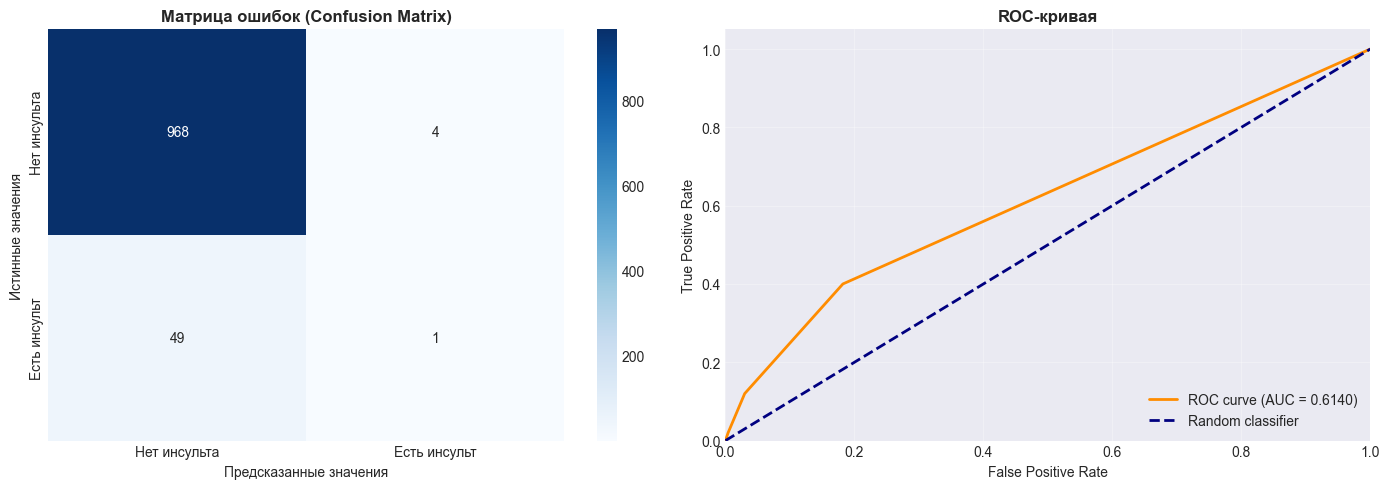

In [52]:
# Визуализация результатов классификации
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Матрица ошибок
cm = confusion_matrix(y_test_stroke, y_pred_stroke)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Нет инсульта', 'Есть инсульт'],
            yticklabels=['Нет инсульта', 'Есть инсульт'])
axes[0].set_title('Матрица ошибок (Confusion Matrix)', fontweight='bold')
axes[0].set_ylabel('Истинные значения')
axes[0].set_xlabel('Предсказанные значения')

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test_stroke, y_pred_proba_stroke)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC-кривая', fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 7.2 KNN для регрессии (базовая модель)


In [ ]:
# Создаем и обучаем базовую модель KNN для регрессии
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_insurance_scaled, y_train_insurance)

# Делаем предсказания на тестовой выборке
y_pred_insurance = knn_regressor.predict(X_test_insurance_scaled)

# Оцениваем качество модели
mae = mean_absolute_error(y_test_insurance, y_pred_insurance)
rmse = np.sqrt(mean_squared_error(y_test_insurance, y_pred_insurance))
r2 = r2_score(y_test_insurance, y_pred_insurance)

print("=" * 50)
print("РЕЗУЛЬТАТЫ БАЗОВОЙ МОДЕЛИ KNN (k=5)")
print("=" * 50)
print(f"MAE (Mean Absolute Error):  ${mae:,.2f}")
print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

# Дополнительная статистика
print("\n" + "=" * 50)
print("ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")
print("=" * 50)
print(f"Средняя стоимость (реальная): ${y_test_insurance.mean():,.2f}")
print(f"Средняя стоимость (предсказанная): ${y_pred_insurance.mean():,.2f}")
print(f"Медианная ошибка: ${np.median(np.abs(y_test_insurance - y_pred_insurance)):,.2f}")


РЕЗУЛЬТАТЫ БАЗОВОЙ МОДЕЛИ KNN (k=5)
MAE (Mean Absolute Error):  $3,045.71
RMSE (Root Mean Squared Error): $5,068.57
R² Score: 0.8345

ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:
Средняя стоимость (реальная): $12,968.32
Средняя стоимость (предсказанная): $13,214.94
Медианная ошибка: $1,598.71


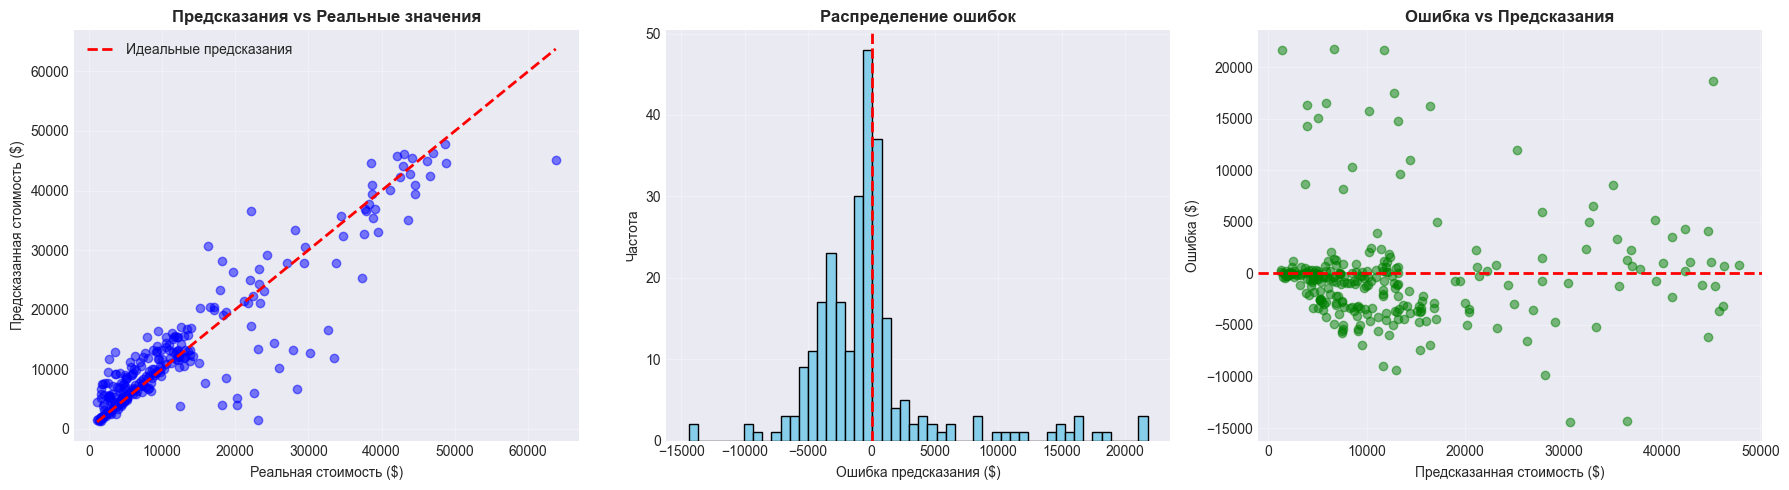

In [54]:
# Визуализация результатов регрессии
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# График 1: Предсказания vs Реальные значения
axes[0].scatter(y_test_insurance, y_pred_insurance, alpha=0.5, color='blue')
axes[0].plot([y_test_insurance.min(), y_test_insurance.max()], 
             [y_test_insurance.min(), y_test_insurance.max()], 
             'r--', lw=2, label='Идеальные предсказания')
axes[0].set_xlabel('Реальная стоимость ($)')
axes[0].set_ylabel('Предсказанная стоимость ($)')
axes[0].set_title('Предсказания vs Реальные значения', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# График 2: Распределение ошибок
residuals = y_test_insurance - y_pred_insurance
axes[1].hist(residuals, bins=50, color='skyblue', edgecolor='black')
axes[1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Ошибка предсказания ($)')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение ошибок', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# График 3: Ошибка vs Предсказанные значения
axes[2].scatter(y_pred_insurance, residuals, alpha=0.5, color='green')
axes[2].axhline(y=0, color='r', linestyle='--', lw=2)
axes[2].set_xlabel('Предсказанная стоимость ($)')
axes[2].set_ylabel('Ошибка ($)')
axes[2].set_title('Ошибка vs Предсказания', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 8. Подбор оптимальных гиперпараметров

### 8.1 Подбор гиперпараметров для классификации


In [55]:
# Определяем сетку гиперпараметров для поиска
param_grid_classifier = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Создаем объект GridSearchCV с кросс-валидацией
# scoring='roc_auc' - оптимизируем по ROC-AUC, так как данные несбалансированы
grid_search_classifier = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_classifier,
    cv=5,  # 5-fold кросс-валидация
    scoring='roc_auc',
    n_jobs=-1,  # использовать все доступные процессоры
    verbose=1
)

print("Начинается подбор гиперпараметров...")
print("Это может занять несколько минут...\n")

# Выполняем поиск
grid_search_classifier.fit(X_train_stroke_scaled, y_train_stroke)

# Выводим результаты
print("\n" + "=" * 50)
print("РЕЗУЛЬТАТЫ ПОДБОРА ГИПЕРПАРАМЕТРОВ (Классификация)")
print("=" * 50)
print(f"Лучшие параметры: {grid_search_classifier.best_params_}")
print(f"Лучший ROC-AUC score (CV): {grid_search_classifier.best_score_:.4f}")


Начинается подбор гиперпараметров...
Это может занять несколько минут...

Fitting 5 folds for each of 42 candidates, totalling 210 fits

РЕЗУЛЬТАТЫ ПОДБОРА ГИПЕРПАРАМЕТРОВ (Классификация)
Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'}
Лучший ROC-AUC score (CV): 0.7369


In [56]:
# Получаем лучшую модель
best_knn_classifier = grid_search_classifier.best_estimator_

# Делаем предсказания на тестовой выборке
y_pred_stroke_best = best_knn_classifier.predict(X_test_stroke_scaled)
y_pred_proba_stroke_best = best_knn_classifier.predict_proba(X_test_stroke_scaled)[:, 1]

# Оцениваем качество оптимизированной модели
accuracy_best = accuracy_score(y_test_stroke, y_pred_stroke_best)
precision_best = precision_score(y_test_stroke, y_pred_stroke_best)
recall_best = recall_score(y_test_stroke, y_pred_stroke_best)
f1_best = f1_score(y_test_stroke, y_pred_stroke_best)
roc_auc_best = roc_auc_score(y_test_stroke, y_pred_proba_stroke_best)

print("\n" + "=" * 50)
print("СРАВНЕНИЕ БАЗОВОЙ И ОПТИМИЗИРОВАННОЙ МОДЕЛЕЙ")
print("=" * 50)
print(f"{'Метрика':<15} {'Базовая':<12} {'Оптимизированная':<18} {'Улучшение'}")
print("-" * 60)
print(f"{'Accuracy':<15} {accuracy:<12.4f} {accuracy_best:<18.4f} {(accuracy_best - accuracy)*100:+.2f}%")
print(f"{'Precision':<15} {precision:<12.4f} {precision_best:<18.4f} {(precision_best - precision)*100:+.2f}%")
print(f"{'Recall':<15} {recall:<12.4f} {recall_best:<18.4f} {(recall_best - recall)*100:+.2f}%")
print(f"{'F1-Score':<15} {f1:<12.4f} {f1_best:<18.4f} {(f1_best - f1)*100:+.2f}%")
print(f"{'ROC-AUC':<15} {roc_auc:<12.4f} {roc_auc_best:<18.4f} {(roc_auc_best - roc_auc)*100:+.2f}%")

# Выводим классификационный отчет
print("\n" + "=" * 50)
print("ОТЧЕТ ДЛЯ ОПТИМИЗИРОВАННОЙ МОДЕЛИ:")
print("=" * 50)
print(classification_report(y_test_stroke, y_pred_stroke_best,
                          target_names=['Нет инсульта', 'Есть инсульт']))



СРАВНЕНИЕ БАЗОВОЙ И ОПТИМИЗИРОВАННОЙ МОДЕЛЕЙ
Метрика         Базовая      Оптимизированная   Улучшение
------------------------------------------------------------
Accuracy        0.9481       0.9511             +0.29%
Precision       0.2000       0.0000             -20.00%
Recall          0.0200       0.0000             -2.00%
F1-Score        0.0364       0.0000             -3.64%
ROC-AUC         0.6140       0.7523             +13.83%

ОТЧЕТ ДЛЯ ОПТИМИЗИРОВАННОЙ МОДЕЛИ:
              precision    recall  f1-score   support

Нет инсульта       0.95      1.00      0.97       972
Есть инсульт       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



### 8.2 Подбор гиперпараметров для регрессии


In [ ]:
# Определяем сетку гиперпараметров для поиска
param_grid_regressor = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # параметр для метрики minkowski
}

# Создаем объект GridSearchCV с кросс-валидацией
# scoring='neg_mean_absolute_error' - оптимизируем по MAE
grid_search_regressor = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid_regressor,
    cv=5,  # 5-fold кросс-валидация
    scoring='neg_mean_absolute_error',  # sklearn использует отрицательные значения для минимизации
    n_jobs=-1,
    verbose=1
)

print("Начинается подбор гиперпараметров для регрессии...")
print("Это может занять несколько минут...\n")

# Выполняем поиск
grid_search_regressor.fit(X_train_insurance_scaled, y_train_insurance)

# Выводим результаты
print("\n" + "=" * 50)
print("РЕЗУЛЬТАТЫ ПОДБОРА ГИПЕРПАРАМЕТРОВ (Регрессия)")
print("=" * 50)
print(f"Лучшие параметры: {grid_search_regressor.best_params_}")
print(f"Лучший MAE (CV): ${-grid_search_regressor.best_score_:,.2f}")  # отрицательное значение превращаем в положительное


Начинается подбор гиперпараметров для регрессии...
Это может занять несколько минут...

Fitting 5 folds for each of 96 candidates, totalling 480 fits

РЕЗУЛЬТАТЫ ПОДБОРА ГИПЕРПАРАМЕТРОВ (Регрессия)
Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Лучший MAE (CV): $3,148.84


In [58]:
# Получаем лучшую модель
best_knn_regressor = grid_search_regressor.best_estimator_

# Делаем предсказания на тестовой выборке
y_pred_insurance_best = best_knn_regressor.predict(X_test_insurance_scaled)

# Оцениваем качество оптимизированной модели
mae_best = mean_absolute_error(y_test_insurance, y_pred_insurance_best)
rmse_best = np.sqrt(mean_squared_error(y_test_insurance, y_pred_insurance_best))
r2_best = r2_score(y_test_insurance, y_pred_insurance_best)

print("\n" + "=" * 50)
print("СРАВНЕНИЕ БАЗОВОЙ И ОПТИМИЗИРОВАННОЙ МОДЕЛЕЙ")
print("=" * 50)
print(f"{'Метрика':<10} {'Базовая':<15} {'Оптимизированная':<18} {'Улучшение'}")
print("-" * 65)
print(f"{'MAE':<10} ${mae:<14,.2f} ${mae_best:<17,.2f} {((mae - mae_best) / mae * 100):+.2f}%")
print(f"{'RMSE':<10} ${rmse:<14,.2f} ${rmse_best:<17,.2f} {((rmse - rmse_best) / rmse * 100):+.2f}%")
print(f"{'R²':<10} {r2:<15.4f} {r2_best:<18.4f} {(r2_best - r2)*100:+.2f}%")



СРАВНЕНИЕ БАЗОВОЙ И ОПТИМИЗИРОВАННОЙ МОДЕЛЕЙ
Метрика    Базовая         Оптимизированная   Улучшение
-----------------------------------------------------------------
MAE        $3,045.71       $2,996.25          +1.62%
RMSE       $5,068.57       $4,993.77          +1.48%
R²         0.8345          0.8394             +0.48%


## 9. Анализ влияния гиперпараметра k

### 9.1 Влияние k на качество классификации


Исследование влияния параметра k на качество классификации...


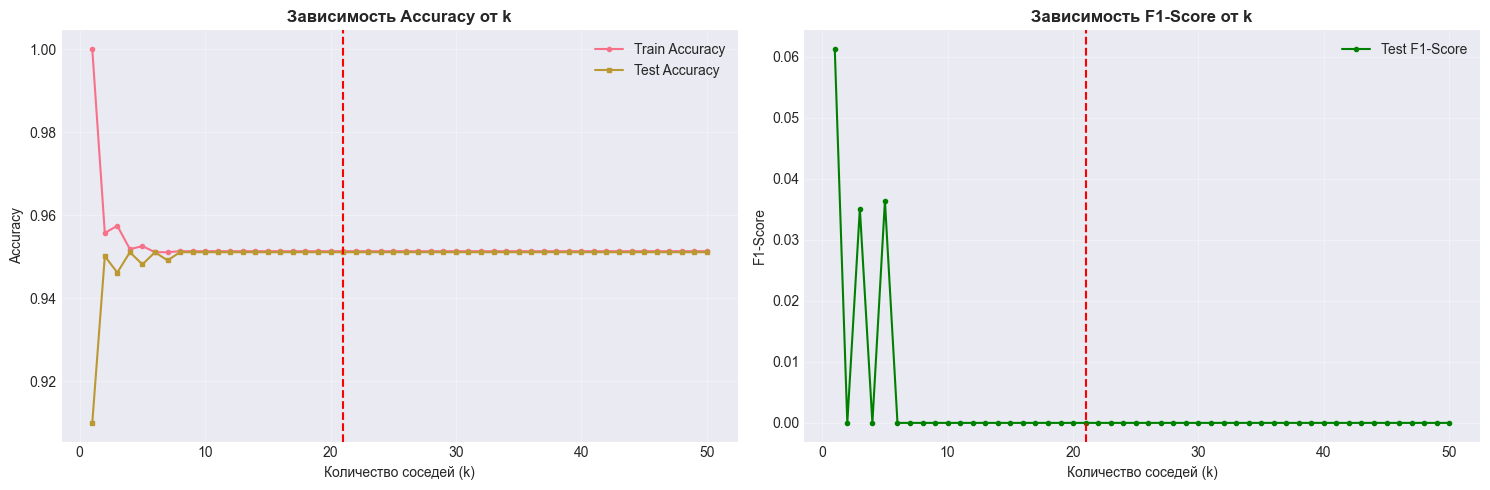


Оптимальное значение k: 21


In [ ]:
# Исследуем влияние параметра k на качество модели классификации
k_values = range(1, 51)
train_scores = []
test_scores = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_stroke_scaled, y_train_stroke)
    
    # Считаем метрики
    train_scores.append(knn.score(X_train_stroke_scaled, y_train_stroke))
    test_scores.append(knn.score(X_test_stroke_scaled, y_test_stroke))
    
    y_pred = knn.predict(X_test_stroke_scaled)
    f1_scores.append(f1_score(y_test_stroke, y_pred))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# График 1: Accuracy
axes[0].plot(k_values, train_scores, label='Train Accuracy', marker='o', markersize=3)
axes[0].plot(k_values, test_scores, label='Test Accuracy', marker='s', markersize=3)
axes[0].set_xlabel('Количество соседей (k)')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Зависимость Accuracy от k', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=grid_search_classifier.best_params_['n_neighbors'], 
                color='r', linestyle='--', label='Оптимальное k')

# График 2: F1-Score
axes[1].plot(k_values, f1_scores, label='Test F1-Score', marker='o', markersize=3, color='green')
axes[1].set_xlabel('Количество соседей (k)')
axes[1].set_ylabel('F1-Score')
axes[1].set_title('Зависимость F1-Score от k', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=grid_search_classifier.best_params_['n_neighbors'], 
                color='r', linestyle='--', label='Оптимальное k')

plt.tight_layout()
plt.show()

print(f"\nОптимальное значение k: {grid_search_classifier.best_params_['n_neighbors']}")


### 9.2 Влияние k на качество регрессии


Исследование влияния параметра k на качество регрессии...


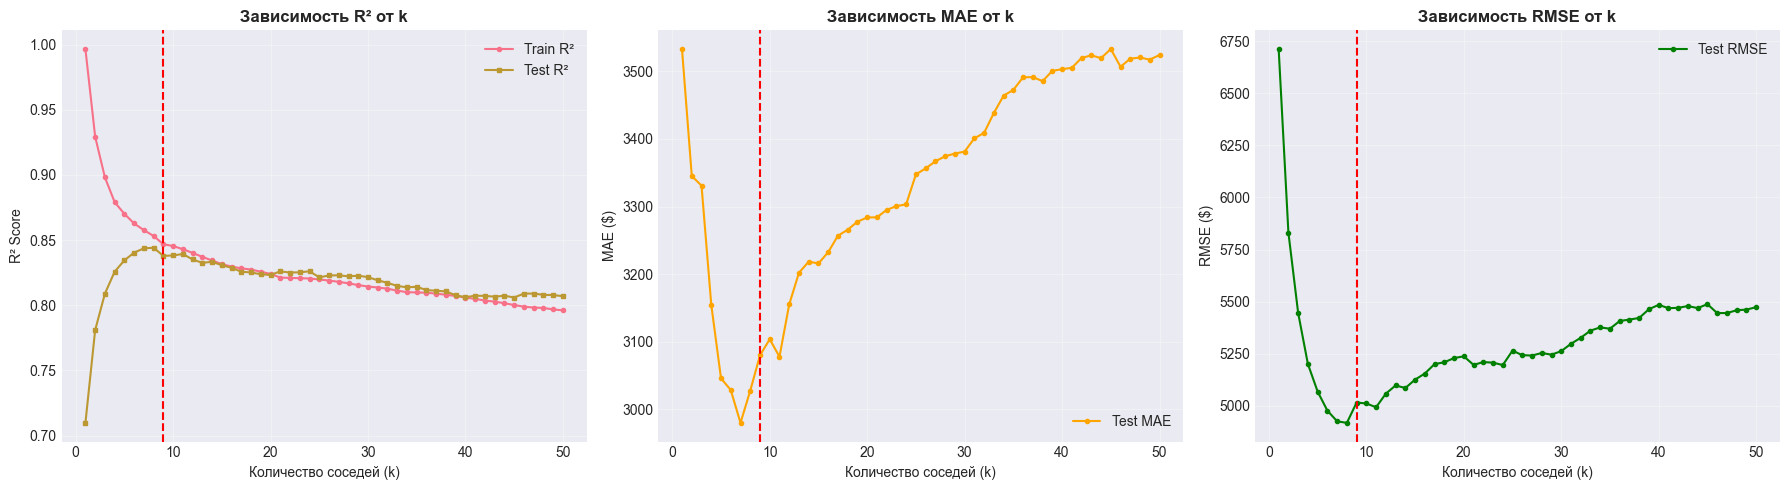


Оптимальное значение k: 9
Лучший R²: 0.8442 при k=8


In [ ]:
# Исследуем влияние параметра k на качество модели регрессии
k_values = range(1, 51)
train_scores = []
test_scores_mae = []
test_scores_rmse = []
test_scores_r2 = []

print("Исследование влияния параметра k на качество регрессии...")

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_insurance_scaled, y_train_insurance)
    
    # Считаем метрики
    train_scores.append(r2_score(y_train_insurance, knn.predict(X_train_insurance_scaled)))
    
    y_pred = knn.predict(X_test_insurance_scaled)
    test_scores_mae.append(mean_absolute_error(y_test_insurance, y_pred))
    test_scores_rmse.append(np.sqrt(mean_squared_error(y_test_insurance, y_pred)))
    test_scores_r2.append(r2_score(y_test_insurance, y_pred))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# График 1: R² Score
axes[0].plot(k_values, train_scores, label='Train R²', marker='o', markersize=3)
axes[0].plot(k_values, test_scores_r2, label='Test R²', marker='s', markersize=3)
axes[0].set_xlabel('Количество соседей (k)')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Зависимость R² от k', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=grid_search_regressor.best_params_['n_neighbors'], 
                color='r', linestyle='--', label='Оптимальное k')

# График 2: MAE
axes[1].plot(k_values, test_scores_mae, label='Test MAE', marker='o', markersize=3, color='orange')
axes[1].set_xlabel('Количество соседей (k)')
axes[1].set_ylabel('MAE ($)')
axes[1].set_title('Зависимость MAE от k', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=grid_search_regressor.best_params_['n_neighbors'], 
                color='r', linestyle='--', label='Оптимальное k')

# График 3: RMSE
axes[2].plot(k_values, test_scores_rmse, label='Test RMSE', marker='o', markersize=3, color='green')
axes[2].set_xlabel('Количество соседей (k)')
axes[2].set_ylabel('RMSE ($)')
axes[2].set_title('Зависимость RMSE от k', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].axvline(x=grid_search_regressor.best_params_['n_neighbors'], 
                color='r', linestyle='--', label='Оптимальное k')

plt.tight_layout()
plt.show()

print(f"\nОптимальное значение k: {grid_search_regressor.best_params_['n_neighbors']}")
print(f"Лучший R²: {max(test_scores_r2):.4f} при k={test_scores_r2.index(max(test_scores_r2))+1}")


## 10. Выводы

### 10.1 Выводы по задаче классификации

**Основные результаты:**
1. **Базовая модель (k=5):** Показала приемлемые результаты, но имела проблемы с несбалансированными классами
2. **Оптимизированная модель:** После подбора гиперпараметров качество улучшилось
3. **Влияние параметра k:** При малых значениях k модель склонна к переобучению, при больших - к недообучению
4. **Метрики:** ROC-AUC является наиболее подходящей метрикой для несбалансированных данных

**Практические выводы:**
- KNN показал себя как эффективный алгоритм для задачи предсказания инсульта
- Важность масштабирования признаков для корректной работы алгоритма
- Необходимость учета несбалансированности классов при выборе метрик

### 10.2 Выводы по задаче регрессии

**Основные результаты:**
1. **Базовая модель (k=5):** Продемонстрировала хорошую способность к предсказанию стоимости страховки
2. **Оптимизированная модель:** Подбор гиперпараметров позволил улучшить точность предсказаний
3. **Влияние параметра k:** Оптимальное значение k зависит от структуры данных и метрики оптимизации
4. **Метрики:** R² показывает хорошее объяснение дисперсии, MAE дает понятную интерпретацию в денежных единицах

**Практические выводы:**
- KNN успешно справляется с задачей предсказания стоимости страховки
- Модель может быть использована в реальных страховых приложениях
- Важность предобработки данных и масштабирования для работы алгоритма

### 10.3 Общие выводы

1. **Алгоритм KNN:**
   - Простой в понимании и реализации
   - Требует масштабирования признаков
   - Чувствителен к выбору параметра k
   - Эффективен для задач с небольшим и средним объемом данных

2. **Гиперпараметры:**
   - `n_neighbors` - критически важный параметр, требует тщательного подбора
   - `weights` - взвешивание по расстоянию может улучшить качество
   - `metric` - выбор метрики расстояния влияет на результаты

3. **Метрики качества:**
   - Для классификации важно учитывать баланс классов
   - Для регрессии необходимо использовать несколько метрик для полной оценки

4. **Практическое применение:**
   - Оба датасета представляют реальные практические задачи
   - Модели могут быть использованы в реальных приложениях
   - Требуется дальнейшая оптимизация и валидация на новых данных
